In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

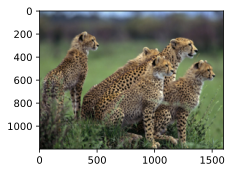

In [9]:
d2l.set_figsize()
img = d2l.Image.open(r'C:\Users\wangzhiqiang\Desktop\deeplearn\img_1.png')
d2l.plt.imshow(img);

In [6]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

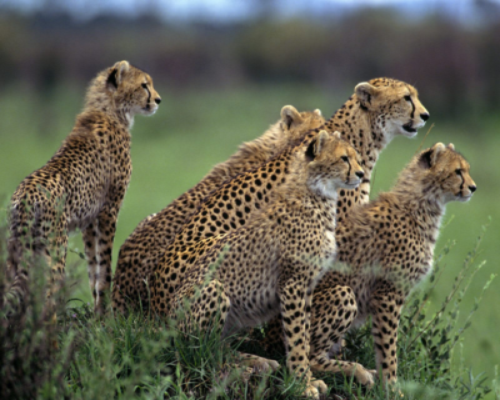

In [12]:
resize = torchvision.transforms.Resize([400,500])
img = resize(img)
img

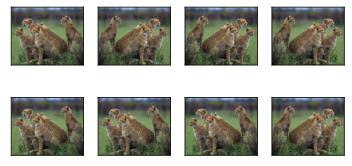

In [13]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

In [ ]:
#50%的几率使图像向左或向右翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

In [ ]:
#50%的几率向上或向下翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

In [ ]:
#将随机裁剪一个面积为原始面积10%到100%的区域，该区域的宽高比从0.5～2之间随机取值。 然后，区域的宽度和高度都被缩放到200像素
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

In [ ]:
#随机更改图像的亮度，随机值为原始图像的50%（）到150%（）之间
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

In [ ]:
#色调
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

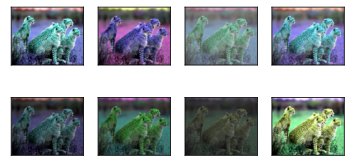

In [14]:
#RandomColorJitter实例，并设置如何同时随机更改图像的亮度（brightness）、对比度（contrast）、饱和度（saturation）和色调（hue）。
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

In [ ]:
#合多种图像增广方法
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)